In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
with open('rbob_data.pickle', 'rb') as f:
    df = pickle.load(f)
    

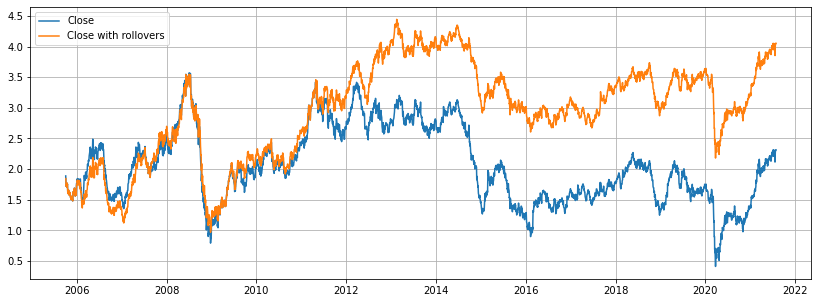

In [3]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['Close_n'], label='Close with rollovers')
plt.grid()
plt.legend(loc='best')
plt.show()

In [4]:
def seasonality(df):
    
    pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                        values=df.columns[0], aggfunc='mean')

    index = ["{0} {1}".format(pv.columns[-1], pv.index[i]) for i in range(len(pv))]
    pv.index = pd.to_datetime(index, format='%Y %j')
        
    pv.ffill(inplace=True)
    pv.fillna(method='backfill', inplace=True)
    pv.dropna(how='all', axis=1, inplace=True)
    
    pv['median'] = pv.mean(axis=1)
    pv['std'] = pv.std(axis=1)
    
    return pv

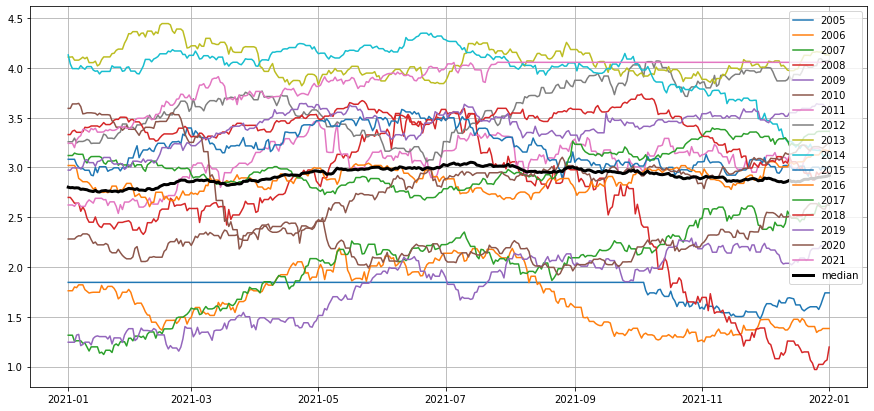

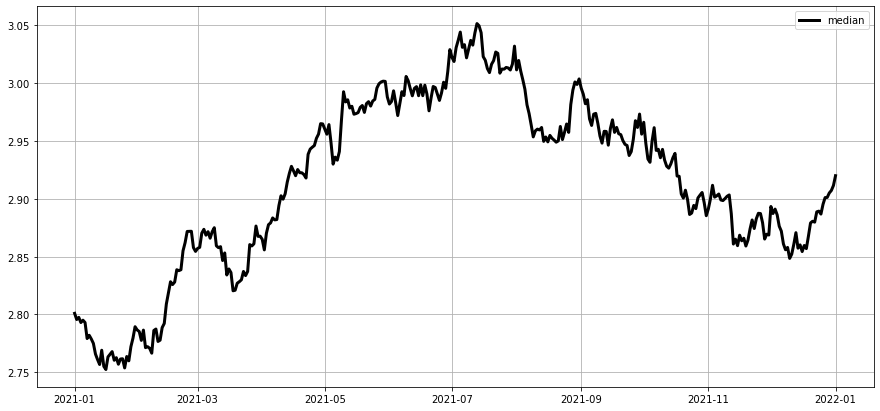

In [5]:
pv_year = seasonality(df[['Close_n']])


plt.figure(figsize=(15,7))
plt.plot(pv_year.iloc[:,:-2])
plt.plot(pv_year['median'], linewidth=3., color='black')
plt.grid()
plt.legend(pv_year.columns, loc='upper right')
plt.show()


plt.figure(figsize=(15,7))
plt.plot(pv_year['median'], linewidth=3., color='black', label='median')
plt.grid()
plt.legend(loc='upper right')
plt.show()

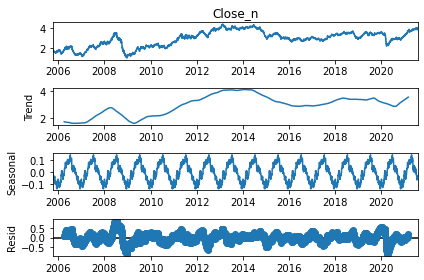

In [6]:
result = seasonal_decompose(df['Close_n'].dropna(), model='additive', period=252)

result.plot()
plt.show()


In [7]:
def get_seasonal_point(ts, t):
    ts.dropna(inplace=True)
    result = seasonal_decompose(ts, model='additive', period=t)
    return result.seasonal.iloc[-1]
    

In [8]:
t = 252
df['season'] = df['Close_n'].rolling(len(df), min_periods=t*3).apply(get_seasonal_point, args=(t,))

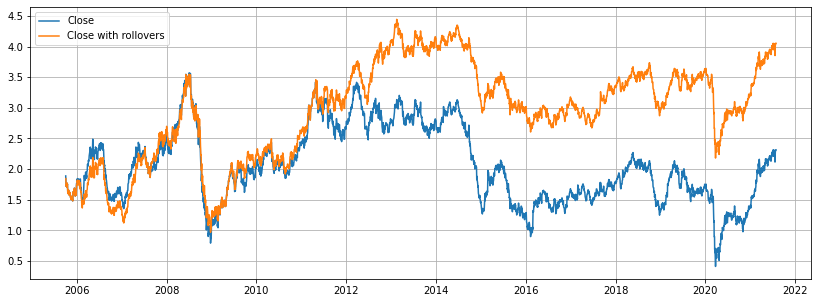

In [9]:
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['Close_n'], label='Close with rollovers')
plt.grid()
plt.legend(loc='best')
plt.show()

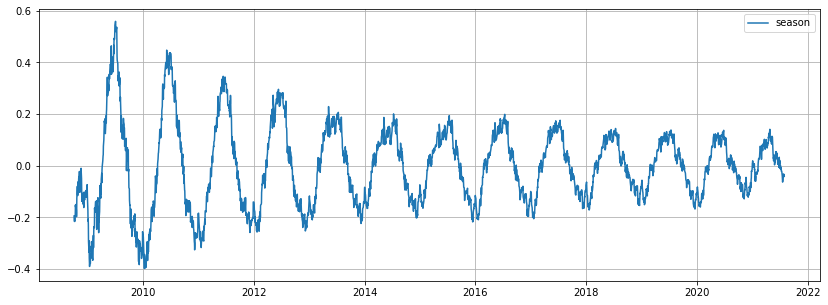

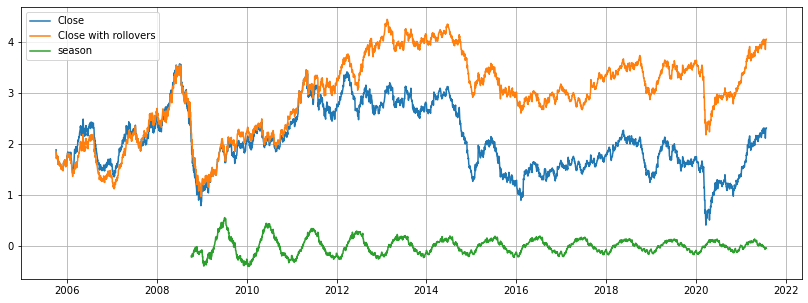

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df['season'], label='season')
plt.grid()
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['Close_n'], label='Close with rollovers')
plt.plot(df['season'], label='season')
plt.grid()
plt.legend(loc='best')
plt.show()